 # Problem 18.37

## Problem

In [1]:
from IPython.display import display, Math, Latex
Latex(r"Два одинаковых однородных стержня длины $l$ и массы $m$ каждый (см. рисунок) соединены пружиной жёсткости $с$. Расстояние между точкой подвеса и точкой закрепления пружины для каждого маятника равно $a$, длина пружины в ненапряженном состоянии равна расстоянию между точками подвеса маятников. Точки подвеса маятников совершают горизонтальные колебания по одинаковому закону $A\,sin\, pt$. Найти движение системы, считая углы отклонения стержней от вертикали малыми.")

<IPython.core.display.Latex object>

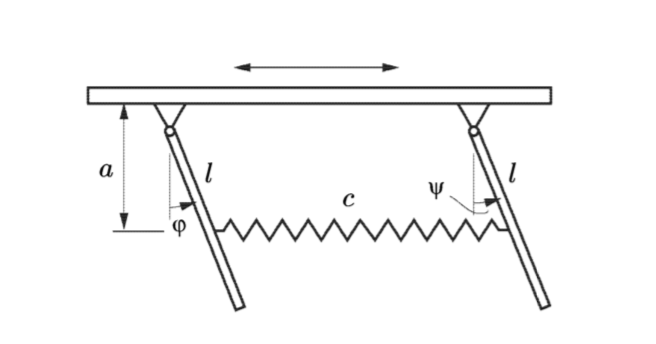

In [2]:
from IPython.display import Image
Image(filename='risunok1.png')

## Solution

In [3]:
Latex(r"Запишем кинетическую $T$ и потенциальную $\Pi$ энергии, выбрав в качестве обобщенных координат $ \overline{q} = \begin{pmatrix} \varphi\\ \psi \end{pmatrix}$. ")

<IPython.core.display.Latex object>

In [4]:
Latex(r"\begin{equation} T = \frac{1}{2} \frac{ml^2}{3} \dot{\varphi}^2 + \frac{ml^2}{6} \dot{\psi}^2\end{equation}")

<IPython.core.display.Latex object>

In [5]:
Latex(r"\begin{equation} \Pi = mg \frac{l}{2}\frac{\varphi^2}{2} + mgl\frac{\psi^2}{4} + \frac{c}{2} ( a \varphi - a \psi ) ^2 \end{equation} ")

<IPython.core.display.Latex object>

In [6]:
Latex(r"Запишем вынуждающую силу в виде $\overline{b} = \begin{pmatrix} \frac{ml}{2} Ap^2 sin\, pt \\ \frac{ml}{2} Ap^2 sin\, pt \end{pmatrix}$")

<IPython.core.display.Latex object>

In [7]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

Зададим параметры системы:

In [8]:
m = 1
l = 1
a = 1
c = 1
g = 10
Amp = 1
p = 3.5
C1 = 20
C2 = 20 
alpha1 = 0
alpha2 = 0

Найдём матрицы Гессе кинетической и потенциальной энергий.

In [9]:
x,y = symbols(' x y ')
def gesse(f):
    print('Анализируемая функция f  для переменных x,y -\n f= ', f )
    fx=f.diff(x)
    fy=f.diff(y)
    try:
             sols=solve([fx,fy],x,y)
    except:
             print('Функция не дифференцируема')
             raise SystemExit(1)
    fxx=f.diff(x,x)
    print('fxx=',fxx)
    fxy=f.diff(x,y)
    print('fxy=',fxy)
    fyy=f.diff(y,y)
    print('fyy=',fyy)
    fyx=fxy
    
    d1=fxx
    M2=Matrix([[fxx,fxy],[fyx,fyy]])
    return M2


func1 = 0.5*m*l**2/3*x**2 + m*l**2/6*y**2
func2 = x**2*(0.25*m*l*g+0.5*c*a**2) + y**2*(m*l*g/4+c*a**a/2) - x*y*c*a**2
AMatrix = gesse(func1)
CMatrix = gesse(func2)

Анализируемая функция f  для переменных x,y -
 f=  0.166666666666667*x**2 + 0.166666666666667*y**2
fxx= 0.333333333333333
fxy= 0
fyy= 0.333333333333333
Анализируемая функция f  для переменных x,y -
 f=  3.0*x**2 - x*y + 3.0*y**2
fxx= 6.00000000000000
fxy= -1
fyy= 6.00000000000000


In [10]:
print("Матрица Гессе кинетической энергии:")
Math("A = " + latex(AMatrix))

Матрица Гессе кинетической энергии:


<IPython.core.display.Math object>

In [11]:
print("Матрица Гессе потенциальной энергии:")
Math("C = " + latex(CMatrix))

Матрица Гессе потенциальной энергии:


<IPython.core.display.Math object>

In [12]:
from sympy import *
import numpy as np
from numpy import matrix

In [13]:
Latex(r"Решим вековое уравнение $det(C-\lambda A) = 0 \Leftrightarrow det(CA^{-1}-\lambda E) = 0 $. Найдём собственные частоты и амплитудные векторы системы.")

<IPython.core.display.Latex object>

In [14]:
A1 = AMatrix.inv() #обратная матрица
B = CMatrix*A1
P = B.eigenvects() #собственная матрица

In [15]:
Math("Первый\; квадрат\; собственной\; частоты,\; его\; кратность,\; амплитудный\; вектор:\; " + latex(P[0]))

<IPython.core.display.Math object>

In [16]:
Math("Второй\; квадрат\; собственной\; частоты,\; его\; кратность,\; амплитудный\; вектор:\; " + latex(P[1]))

<IPython.core.display.Math object>

In [17]:
Latex(r"Перейдём в нормальные координаты с помощью матрицы перехода $S$, выполним нормировку матрицы перехода $S$ в $A$-метрике ($\,u^T_i\,A\,u_j = \delta_{i\,j}\,$), найдём вектор вынуждающей силы в нормальных координатах $d$, затем найдём амплитуды частного решения в нормальных координатах. Вернувшись в исходные координаты, получим частное решение неоднородного и ответ к задаче как сумму общего решения однородного уравнения и частного решения неоднородного.")

<IPython.core.display.Latex object>

In [18]:
b = Matrix([[m*l*0.5*Amp*p**2],[m*l*0.5*Amp*p**2]]) #вынуждающая сила 

p1 = P[0][2]
p11= p1[0]   #eigen vector 1 
p2 = P[1][2] 
p22 = p2[0]  #eigen vector 2

norm = sqrt(3/(2*m*l**2)) #коэффициент нормировки

s = Matrix([[p11[0],p22[0]],[p11[1],p22[1]]])*norm #transition matrix

s1 = s.T
d = s1*b #transition to normal coordinates

avec = Matrix([[d[0]/(P[0][0]-p**2)], [d[1]/(P[1][0]-p**2)]]) #поиск амплитуд частного решения

q1 = s*avec #переход от нормальных к исходных координатам

t = symbols('t')

#Итоговый ответ как сумма общего решения однородного и частного решения q1 неоднородного уравнения
q = C1*p11*sin(sqrt(P[0][0])*t + alpha1) + C2*p22*sin(sqrt(P[1][0])*t + alpha2) + q1*sin(p*t)

## Answer 

In [19]:
Math(r"\overline{q} = " + r"\begin{pmatrix} \varphi\\ \psi \end{pmatrix} = " + latex(q))

<IPython.core.display.Math object>

## Application

In [20]:
Latex(r"График зависимости первой обобщенной координаты от времени" + r"$\;\;f(t) = \varphi (t)$")

<IPython.core.display.Latex object>

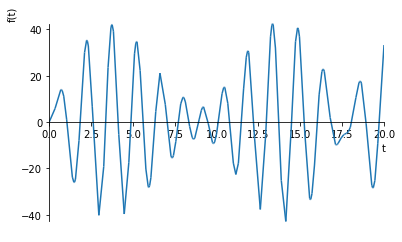

In [21]:
from sympy.plotting import plot
t = symbols('t')
q = C1*p11*sin(sqrt(P[0][0])*t + alpha1) + C2*p22*sin(sqrt(P[1][0])*t + alpha2) + q1*sin(p*t) 
plot(q[0], (t, 0, 20))

In [22]:
Latex(r"График зависимости второй обобщенной координаты от времени" + r"$\;\;f(t) = \psi (t)$")

<IPython.core.display.Latex object>

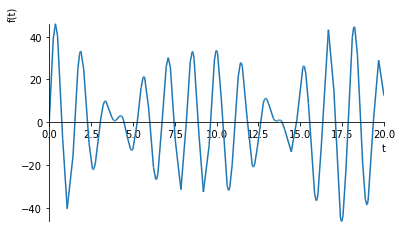

In [23]:
plot(q[1], (t, 0, 20))

In [283]:
Latex(r"Интегральные кривые и фазовые траектории при на небольшом промежутке $t$")

<IPython.core.display.Latex object>

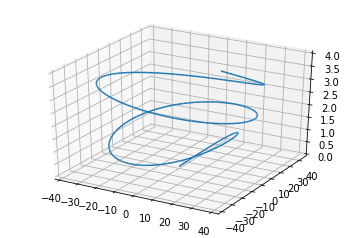

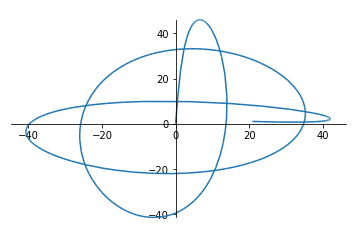

In [291]:
from sympy import Symbol
from sympy.plotting import (plot_parametric,
                            plot3d_parametric_line)
plot3d_parametric_line(q[0], q[1], t, (t, 0,4))
plot_parametric(q[0], q[1], (t, 0,4))

In [285]:
Latex(r"Интегральные кривые и фазовые траектории при на большом промежутке $t$")

<IPython.core.display.Latex object>

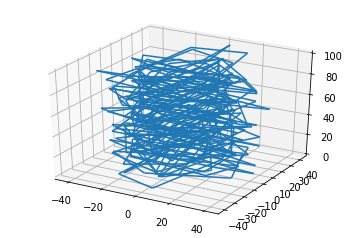

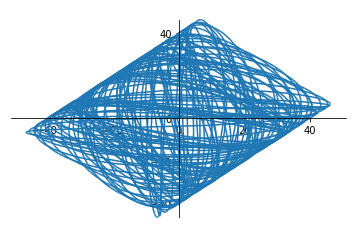

In [289]:
from sympy import Symbol
from sympy.plotting import (plot_parametric,
                            plot3d_parametric_line)
plot3d_parametric_line(q[0], q[1], t, (t, 0,100))
plot_parametric(q[0], q[1], (t, 0,100))